In [26]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import astropy.io.fits as fits
import os
from scipy.io.idl import readsav
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
from astropy.time import Time

%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
xmm_file = 'Trappist-1.fits'

In [3]:
hdul = fits.open(xmm_file)

In [4]:
hdul.info()

Filename: Trappist-1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      26   ()      
  1  Obs Spectrum    1 BinTableHDU     44   8R x 12C   [E, E, E, E, E, E, E, E, E, E, E, E]   
  2  Model Spectrum    1 BinTableHDU     21   2401R x 4C   [E, E, E, E]   
  3  Light curve    1 BinTableHDU     20   6R x 3C   [E, E, E]   


In [5]:
for i in (1,2,3):
    data = hdul[i].data
    print(data.names)

['Wave', 'bin_width', 'Rate', 'Rate_err', 'pn_Rate', 'pn_Rate_err', 'Flux', 'Flux_err', 'MFlux', 'Correction', 'CFlux', 'CFlux_err']
['Wave', 'bin_width', 'Rate', 'Flux']
['Time', 'Rate', 'Error']


In [6]:
hdul[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   48 / length of dimension 1                          
NAXIS2  =                    8 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   12 / number of table fields                         
TTYPE1  = 'Wave    '                                                            
TFORM1  = 'E       '                                                            
TUNIT1  = 'Angstrom'                                                            
TTYPE2  = 'bin_width'                                                           
TFORM2  = 'E       '        

<ErrorbarContainer object of 3 artists>

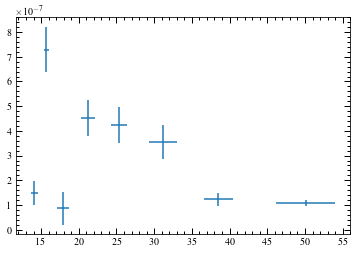

In [7]:
data = hdul[1].data
#plt.errorbar(data['WAVE'], data['CFlux'], xerr=data['BIN_WIDTH']/2, yerr = data['CFLUX_err'], ls ='none')
#plt.errorbar(data['WAVE'], data['Flux'], xerr=data['BIN_WIDTH']/2, yerr = data['FLUX_err'], ls ='none')
plt.errorbar(data['WAVE'], data['RATE'], xerr=data['BIN_WIDTH']/2, yerr = data['RATE_err'], ls ='none')


In [8]:
np.trapz(data['RATE'], data['WAVE'])/23000

4.199953210722331e-10

(-1, 65)

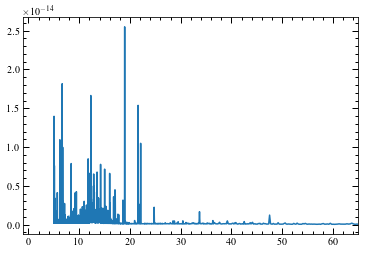

In [9]:
mdata = hdul[2].data
plt.plot(mdata['WAVE'], mdata['FLUX'])
#plt.plot(data['WAVE'], data['MFLUX'])
plt.xlim(-1, 65)

<ErrorbarContainer object of 3 artists>

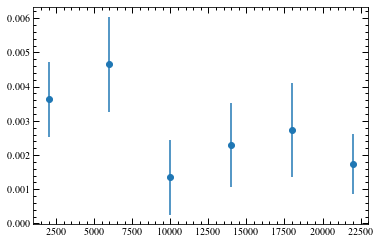

In [10]:
lc = hdul[3].data
plt.errorbar(lc['TIME'], lc['RATE'], yerr=lc['ERROR'], marker='o', ls='none')

(-1, 65)

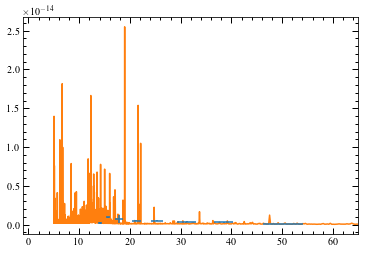

In [11]:
plt.errorbar(data['WAVE'], data['CFlux'], xerr=data['BIN_WIDTH']/2, yerr = data['CFLUX_err'], ls ='none')
plt.plot(mdata['WAVE'], mdata['FLUX'], zorder=-1)
plt.xlim(-1, 65)

In [12]:
hdul[2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   16 / length of dimension 1                          
NAXIS2  =                 2401 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    4 / number of table fields                         
TTYPE1  = 'Wave    '                                                            
TFORM1  = 'E       '                                                            
TUNIT1  = 'Angstrom'                                                            
TTYPE2  = 'bin_width'                                                           
TFORM2  = 'E       '        

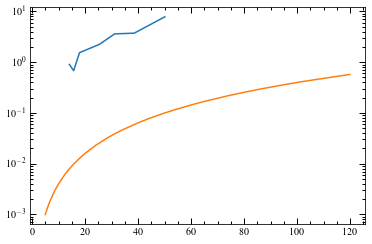

In [13]:
plt.plot(data['wave'],data['bin_width'])
plt.plot(mdata['wave'],mdata['bin_width'])
plt.yscale('log')

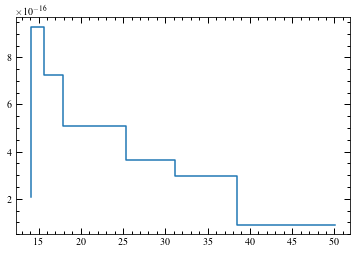

In [14]:
plt.step(data['WAVE'], data['CFlux'])


In [15]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TARGET  = 'Trappist-1'                                                          
OBS_ID  = '0810210101'                                                          
HIERARCH pn_FILTER = 'Thin1   '                                                 
HIERARCH pn_MODE = 'IMAGING '                                                   
HIERARCH pn_SUBMODE = 'PrimeFullWindow'                                         
HIERARCH pn_DATE-OBS = '2018-12-10T04:36:47'                                    
HIERARCH pn_DATE-END = '2018-12-10T10:32:49'                                    
HIERARCH pn_EXP_ID = '0810210101001'                                            
HIERARCH pn_DURATION = 23518

So...I think CFlux is the one to add, have emailed to confirm. No information in headers about what the model parameters are? Lightcurve looks consistent with a straight line. Going to add CFlux to the big spectrum.

In [16]:
from astropy.time import Time

In [17]:
t = Time(hdul[0].header['HIERARCH pn_DATE-OBS'])

In [18]:
t

<Time object: scale='utc' format='isot' value=2018-12-10T04:36:47.000>

In [19]:
t.mjd

58462.19221064815

In [20]:
hdul[3].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   12 / length of dimension 1                          
NAXIS2  =                    6 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    3 / number of table fields                         
TTYPE1  = 'Time    '                                                            
TFORM1  = 'E       '                                                            
TUNIT1  = 's       '                                                            
TTYPE2  = 'Rate    '                                                            
TFORM2  = 'E       '        

In [21]:
np.median(lc['RATE']), np.mean(lc['RATE'])

(0.002511966, 0.0027313966)

Make a nice plot - could add the lightcurve if CS has advice on how not to make it negative. Yes- background subtraction was incorrect.

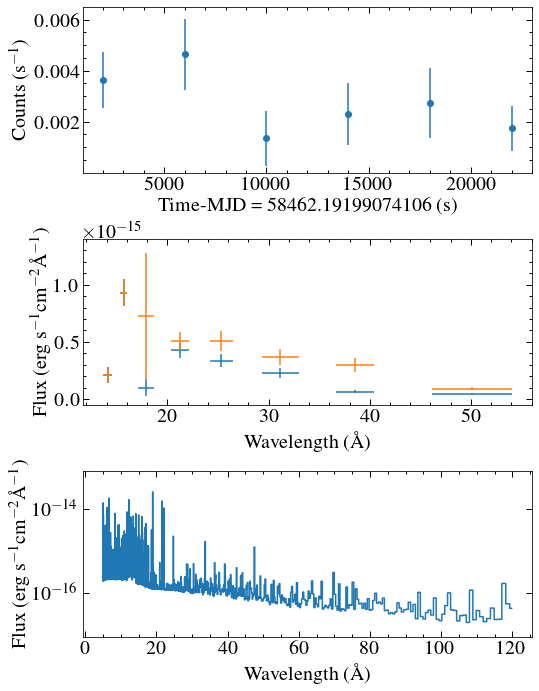

In [47]:
plt.figure(figsize = (8, 10))
#plt.subplots_adjust(top =0.99, right =0.99, hspace=0.25, bottom= 0.07)

#lightcurve
plt.subplot(311)
plt.errorbar(lc['TIME'], lc['RATE'], yerr=lc['ERROR'], marker='o', ls='none')
plt.xlabel('Time-MJD = 58462.19199074106 (s)')
plt.ylabel('Counts (s$^{-1}$)')
plt.ylim(0.000001, 0.0065)

#spectrum
plt.subplot(312)
plt.errorbar(data['WAVE'], data['Flux'], xerr=data['BIN_WIDTH']/2, yerr = data['FLUX_err'], ls ='none')
plt.errorbar(data['WAVE'], data['CFlux'], xerr=data['BIN_WIDTH']/2, yerr = data['CFLUX_err'], ls ='none')
plt.ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)')
plt.xlabel('Wavelength (\AA)')
plt.ylim(-0.05e-15, 1.4e-15)

#model
plt.subplot(313)
plt.step(mdata['WAVE'], mdata['FLUX'], where='mid')
plt.ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)')
plt.xlabel('Wavelength (\AA)')
plt.yscale('log')
plt.ylim(9e-18, 8e-14)
plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.savefig('t1_xmm.pdf', dpi=150, overwrite=True)



In [23]:
Time(2458462.691990741, format='jd').mjd

58462.19199074106

In [24]:
data['WAVE'][0], data['WAVE'][-1]

(14.1, 50.1)

In [25]:
mdata['WAVE'][0],mdata['WAVE'][-1]

(5.0, 119.8)